In [92]:
# let's get started with our imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [95]:
# set up default visualization parameters:

mpl.rcParams['figure.figsize'] = [16,10]
viz_dict = {
    'figure.figsize':[10, 6],
    'axes.titlesize':18,
    'axes.labelsize':16,
}
sns.set_context("notebook", rc=viz_dict)
sns.set_style("whitegrid")

In [96]:
# load data-set:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data = pd.read_csv('data/iris.data', names=cols)

#look at data-set:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


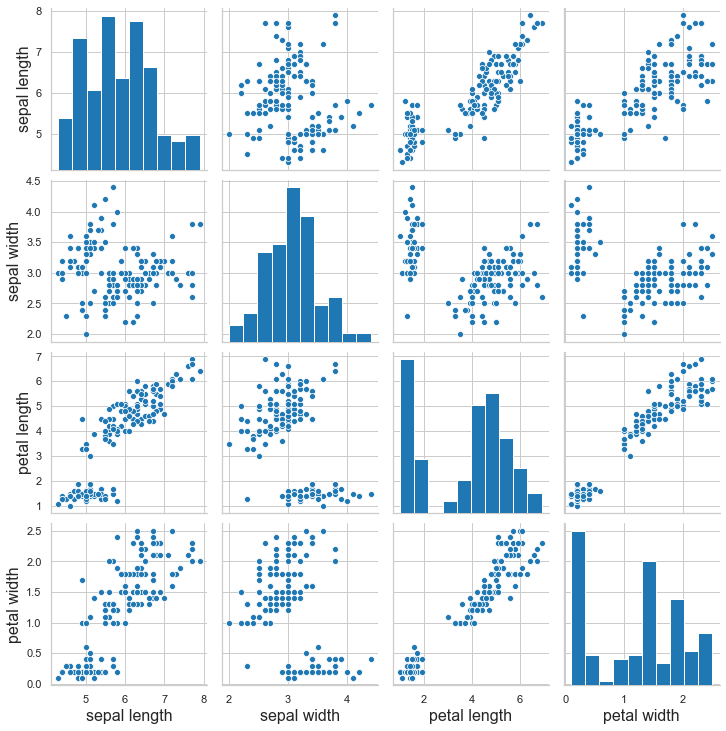

In [97]:
sns.pairplot(data)

In [98]:
# convert categorical data to numbers:
data['class'], int2class_class = pd.factorize(data['class'])

# seperate dependent/independant variables
X = data.loc[:,'sepal length':'petal width']
Y = data['class']

# scale continuous data points:
X = preprocessing.scale(X)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)
regressor = linear_model.LogisticRegression()

# fit model:
regressor.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_train

149    2
99     1
30     0
101    2
38     0
      ..
142    2
111    2
107    2
105    2
85     1
Name: class, Length: 120, dtype: int64

In [100]:
# Make predictions on test data:
y_pred = regressor.predict(x_test)
y_pred

array([2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0,
       2, 1, 1, 0, 2, 0, 0, 0], dtype=int64)

In [101]:
# a method to pretty print python dictionary:
def pprint(web, level=0):
    for k,v in web.items():
        if isinstance(v, dict):
            print('\t'*level, f'{k}: ')
            level += 1
            pprint(v, level)
            level -= 1
        else:
            print('\t'*level, k, ": ", v)

In [102]:
evaluation = metrics.classification_report(y_test, 
                                        y_pred, 
                                        labels=[0,1,2],
                                        target_names=pd.unique(data['class']),
                                        output_dict=True
                                       )

In [103]:
pprint(evaluation)

 0: 
	 precision :  1.0
	 recall :  1.0
	 f1-score :  1.0
	 support :  10
 1: 
	 precision :  1.0
	 recall :  1.0
	 f1-score :  1.0
	 support :  9
 2: 
	 precision :  1.0
	 recall :  1.0
	 f1-score :  1.0
	 support :  11
 accuracy :  1.0
 macro avg: 
	 precision :  1.0
	 recall :  1.0
	 f1-score :  1.0
	 support :  30
 weighted avg: 
	 precision :  1.0
	 recall :  1.0
	 f1-score :  1.0
	 support :  30


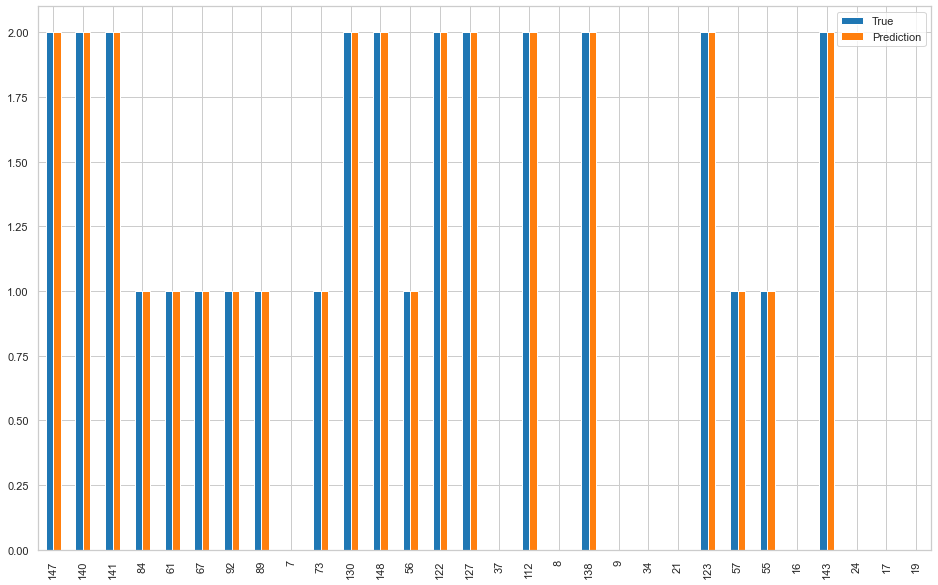

In [120]:
# So we did pretty good. 
# In fact, our model perfectly predicted the test-set's classifications.

results = pd.DataFrame({'True': y_test, 'Prediction': y_pred})
results.plot(kind='bar')

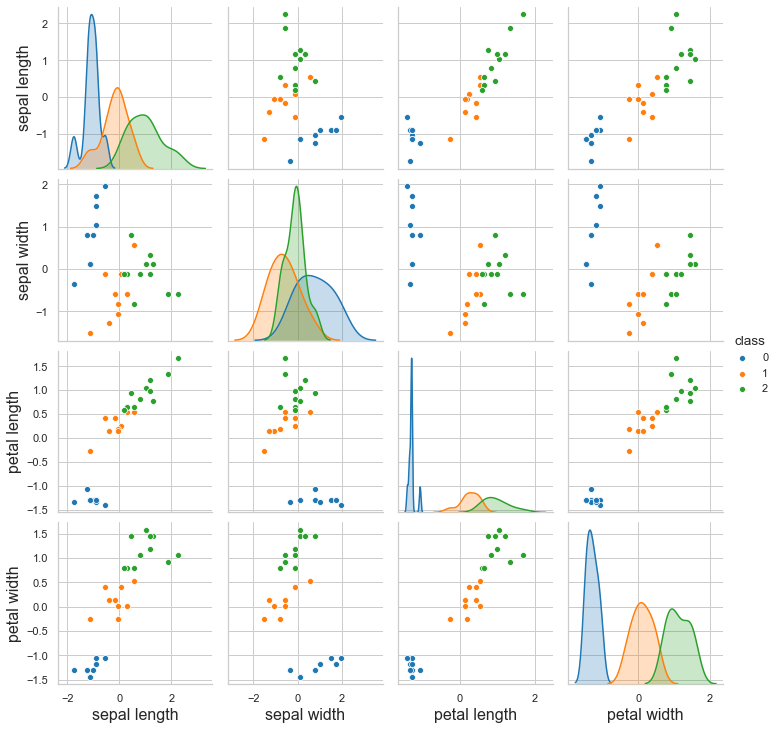

In [116]:
plot_df = pd.concat([pd.DataFrame(x_test), pd.Series(y_pred)], axis=1)
plot_df.columns = data.columns
sns.pairplot(plot_df, hue='class')